<a href="https://colab.research.google.com/github/gabtrevisan/explainableAI/blob/main/Histograma_Fake_News_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def texts_to_words_list(texts):
  words_list = texts.str.cat(sep=', ')
  words_list = words_list.split(" ")
  return words_list

In [3]:
def save_words_count_file(words_list, filename):
  f = open(filename, "w")
  f.write("word,count\n")
  words_count = Counter(words_list)
  for (word,count) in words_count.most_common():
    f.write(word+","+str(count)+"\n")
  f.close()

In [4]:
def plot_histogram(words_list, words_limit=10, x_title="words", y_title="occurences", figure_title="", figure_width=6.4, figure_height=4.8, figure_rotation_x=90):
  most_common = Counter(words_list).most_common(words_limit)
  list_words = [item[0] for item in most_common]
  list_count = [item[1] for item in most_common]

  df = pd.DataFrame({x_title: list_words, y_title: list_count})

  plt.figure(figsize=[figure_width, figure_height])
  sns.barplot(x=x_title, y=y_title, data=df)
  plt.xticks(rotation=figure_rotation_x)
  plt.title(figure_title)
  plt.show()

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv")

In [6]:
fake_texts = df[df['label'] == 'fake'].preprocessed_news
fake_words_list = texts_to_words_list(fake_texts)

In [7]:
save_words_count_file(fake_words_list, "fake_words_dataset.csv")

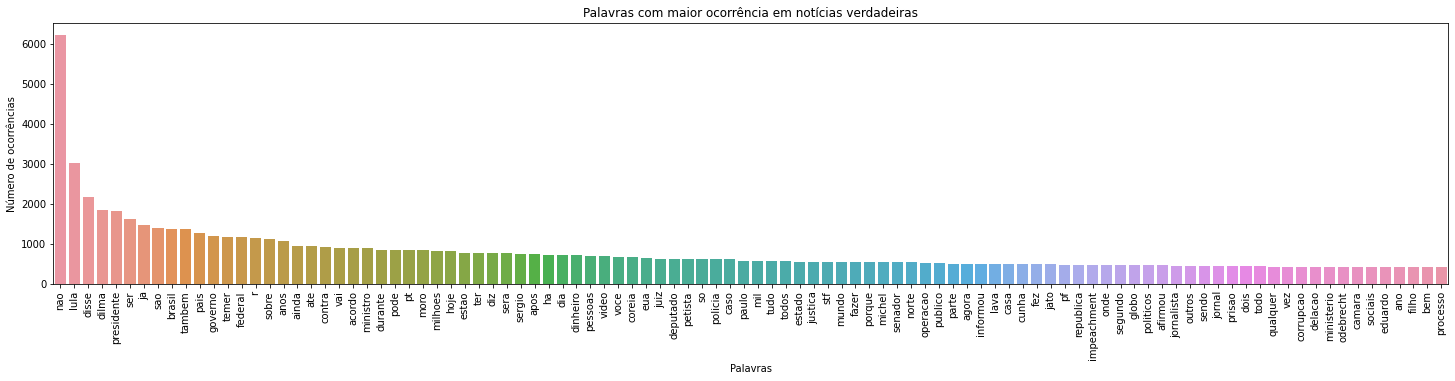

In [12]:
plot_histogram(fake_words_list, words_limit=100, figure_title="Palavras com maior ocorrência em notícias verdadeiras", x_title="Palavras", y_title="Número de ocorrências", figure_width=25)


In [9]:
true_texts = df[df['label'] == 'true'].preprocessed_news
true_words_list = texts_to_words_list(true_texts)

In [10]:
save_words_count_file(true_words_list, "true_words_dataset.csv")

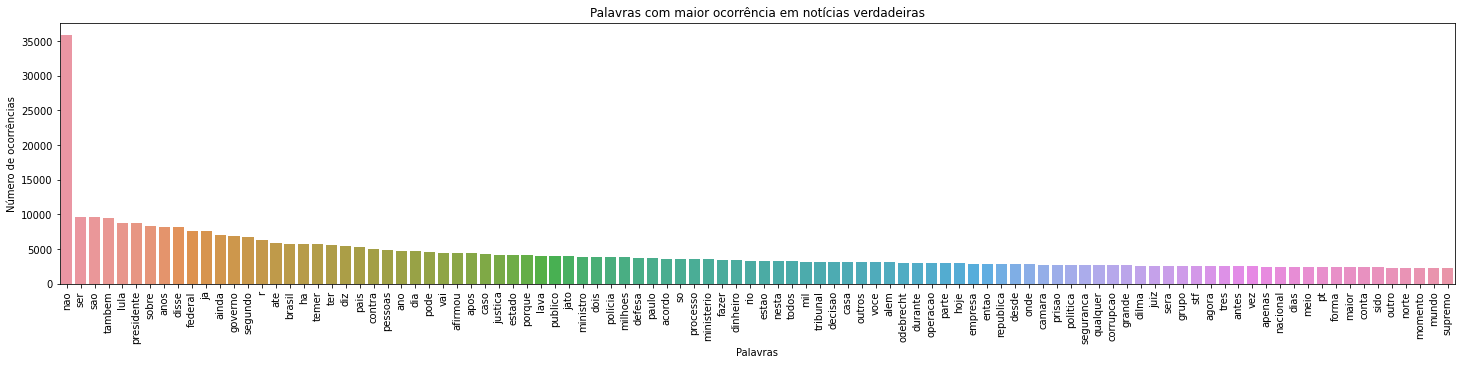

In [13]:
plot_histogram(true_words_list, words_limit=100, figure_title="Palavras com maior ocorrência em notícias verdadeiras", x_title="Palavras", y_title="Número de ocorrências", figure_width=25)